In [1]:
import pandas as pd
import seaborn as sns

In [2]:
test_df = pd.read_csv('data/train/2.csv')
test_df.head()

,time,V0000,V0001,V0002,V0003,V0004,V0005,V0006,V0007,V0008,...,V5111,V5112,V5113,V5114,V5115,V5116,V5117,V5118,V5119,V5120
0,0,30.487668,8.695858,8.725637,8.706757,8.718331,185.841759,181.363499,4.358551e-19,0.0,...,1.0,1.0,1.0,1.0,60.0,127.58,112.263,-0.264721,85.4,-0.004474
1,1,30.456070,8.725438,8.700957,8.745483,8.716427,220.977269,217.167044,5.404437e-19,0.0,...,1.0,1.0,1.0,1.0,60.0,0.00,0.000,-0.000015,85.4,0.000000
2,2,30.465885,8.665168,8.712006,8.743953,8.685613,191.973838,171.552277,-6.468731e-19,0.0,...,1.0,1.0,1.0,1.0,60.0,0.00,0.000,0.000006,85.4,0.000000
3,3,30.485543,8.813259,8.694419,8.693845,8.670241,170.410869,164.837174,4.838998e-19,0.0,...,1.0,1.0,1.0,1.0,60.0,0.00,0.000,0.000015,85.4,0.000000
4,4,30.490843,8.750808,8.706728,8.729455,8.691120,184.351789,190.772124,-3.959301e-19,0.0,...,1.0,1.0,1.0,1.0,60.0,0.00,0.000,-0.000005,85.4,0.000000


In [3]:
# drop columns with single value (dropped 2812 cols)
test_df = test_df.loc[:, test_df.nunique() > 1]
test_df.head()

,time,V0000,V0001,V0002,V0003,V0004,V0005,V0006,V0007,V0009,...,V5086,V5087,V5088,V5089,V5090,V5115,V5116,V5117,V5118,V5120
0,0,30.487668,8.695858,8.725637,8.706757,8.718331,185.841759,181.363499,4.358551e-19,-0.000662,...,-0.307733,-0.231436,-0.196375,-0.144715,43.205409,60.0,127.58,112.263,-0.264721,-0.004474
1,1,30.456070,8.725438,8.700957,8.745483,8.716427,220.977269,217.167044,5.404437e-19,-0.000311,...,-0.302704,-0.232338,-0.221749,-0.133544,43.203509,60.0,0.00,0.000,-0.000015,0.000000
2,2,30.465885,8.665168,8.712006,8.743953,8.685613,191.973838,171.552277,-6.468731e-19,0.001242,...,-0.289594,-0.225218,-0.184241,-0.157746,43.198009,60.0,0.00,0.000,0.000006,0.000000
3,3,30.485543,8.813259,8.694419,8.693845,8.670241,170.410869,164.837174,4.838998e-19,-0.000074,...,-0.301588,-0.227017,-0.171003,-0.128855,43.200063,60.0,0.00,0.000,0.000015,0.000000
4,4,30.490843,8.750808,8.706728,8.729455,8.691120,184.351789,190.772124,-3.959301e-19,0.001377,...,-0.296862,-0.231743,-0.202699,-0.137516,43.209449,60.0,0.00,0.000,-0.000005,0.000000


In [4]:
# Checking dtyps of columns (most of which are float64)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Columns: 2310 entries, time to V5120
dtypes: float64(2309), int64(1)
memory usage: 10.6 MB


In [5]:
%%time

# Checking columns with less than 10 unique values (got 73 cols)
col_list = []
for col in test_df.columns:
    if test_df[col].nunique() < 10:
        col_list.append(col)
    pass

print(f'no of cols : {len(col_list)}')
print(col_list)
print()

no of cols : 73
['V0163', 'V0164', 'V0165', 'V0166', 'V0495', 'V0504', 'V0508', 'V0516', 'V0518', 'V0725', 'V0726', 'V0727', 'V0729', 'V0751', 'V0757', 'V0765', 'V1231', 'V1390', 'V1437', 'V1481', 'V1482', 'V1492', 'V1493', 'V1494', 'V1533', 'V1756', 'V1757', 'V1817', 'V2159', 'V2164', 'V2165', 'V2171', 'V2176', 'V2346', 'V2347', 'V2352', 'V2353', 'V2358', 'V2359', 'V2370', 'V2371', 'V2687', 'V2688', 'V2689', 'V2690', 'V2691', 'V2692', 'V2720', 'V2831', 'V2832', 'V2833', 'V2834', 'V3614', 'V3624', 'V3625', 'V3661', 'V3667', 'V3669', 'V3670', 'V3672', 'V3673', 'V3815', 'V3840', 'V3872', 'V3889', 'V3890', 'V3905', 'V4310', 'V4696', 'V5115', 'V5116', 'V5117', 'V5120']

Wall time: 458 ms


In [6]:
for col in col_list[:5]:
    print(test_df[col].dtype)
    print(test_df[col].value_counts())
    print()

float64
209.42784    229
209.42856    156
209.42928    110
209.43000     55
209.43072     50
Name: V0163, dtype: int64

float64
209.44872    213
209.44800    162
209.44944    107
209.45088     62
209.45016     56
Name: V0164, dtype: int64

float64
209.45664    194
209.45592    187
209.45736    109
209.45880     55
209.45808     55
Name: V0165, dtype: int64

float64
209.45592    218
209.45664    168
209.45736    113
209.45808     54
209.45880     47
Name: V0166, dtype: int64

float64
0.791280    350
0.791287    250
Name: V0495, dtype: int64



In [7]:
# strange column - values of each row seems to be same for all files
test_df.V5120.head()

0   -0.004474
1    0.000000
2    0.000000
3    0.000000
4    0.000000
Name: V5120, dtype: float64

In [8]:
# Checking Null values (got 0 Null values)
sr = test_df.isna().any()
sr[sr == True]

Series([], dtype: bool)

In [9]:
# Handling with basic statistics
stattistic_var = test_df.describe().loc[['std','mean'], :]
stattistic_var.loc['norm_std'] = stattistic_var.loc['std'] / stattistic_var.loc['mean']
stattistic_var.loc['norm_std_abs'] = stattistic_var.loc['norm_std'].abs()
stattistic_var

,time,V0000,V0001,V0002,V0003,V0004,V0005,V0006,V0007,V0009,...,V5086,V5087,V5088,V5089,V5090,V5115,V5116,V5117,V5118,V5120
std,173.349358,0.011458,0.067428,0.016491,0.026200,0.020535,14.239186,26.017909,4.144260e-19,0.001393,...,0.009251,0.008359,0.028457,0.014068,0.005689,4.082483e-06,5.208432,4.583118,0.010807,0.000183
mean,299.500000,30.470232,8.727693,8.706884,8.707742,8.708513,192.735225,191.627472,-2.506859e-21,-0.000022,...,-0.294564,-0.236169,-0.196618,-0.157457,43.200357,6.000000e+01,0.212633,0.187105,-0.000441,-0.000007
norm_std,0.578796,0.000376,0.007726,0.001894,0.003009,0.002358,0.073880,0.135773,-1.653168e+02,-63.784180,...,-0.031405,-0.035394,-0.144732,-0.089346,0.000132,6.804138e-08,24.494897,24.494897,-24.490779,-24.494897
norm_std_abs,0.578796,0.000376,0.007726,0.001894,0.003009,0.002358,0.073880,0.135773,1.653168e+02,63.784180,...,0.031405,0.035394,0.144732,0.089346,0.000132,6.804138e-08,24.494897,24.494897,24.490779,24.494897


In [10]:
stattistic_var.sort_values('norm_std_abs', axis=1, ascending=False)

,V3515,V0760,V3266,V4535,V1209,V1834,V3591,V2671,V0541,V2662,...,V1437,V0729,V0516,V1817,V1757,V1756,V1231,V1390,V0829,V5115
std,0.058533,0.010528,0.063030,0.102193,5.200685,2.284245e-04,0.054930,0.093210,0.002850,1.590394,...,0.000003,0.000051,0.000051,5.240427e-05,5.001919e-06,5.001919e-06,5.004144e-05,5.004144e-05,6.661141e-06,4.082483e-06
mean,0.000008,-0.000003,0.000020,0.000043,-0.002738,1.427031e-07,-0.000042,-0.000092,-0.000004,-0.002402,...,2.958245,47.315682,47.315682,5.255257e+01,9.192275e+00,9.192275e+00,9.399245e+01,9.399245e+01,2.254090e+01,6.000000e+01
norm_std,7363.268466,-3208.889857,3112.379165,2361.433110,-1899.339452,1.600697e+03,-1294.849508,-1016.245217,-683.390162,-662.170390,...,0.000001,0.000001,0.000001,9.971780e-07,5.441438e-07,5.441438e-07,5.323985e-07,5.323985e-07,2.955136e-07,6.804138e-08
norm_std_abs,7363.268466,3208.889857,3112.379165,2361.433110,1899.339452,1.600697e+03,1294.849508,1016.245217,683.390162,662.170390,...,0.000001,0.000001,0.000001,9.971780e-07,5.441438e-07,5.441438e-07,5.323985e-07,5.323985e-07,2.955136e-07,6.804138e-08


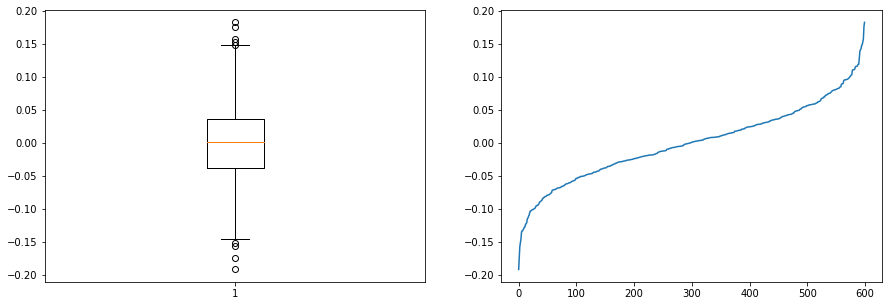

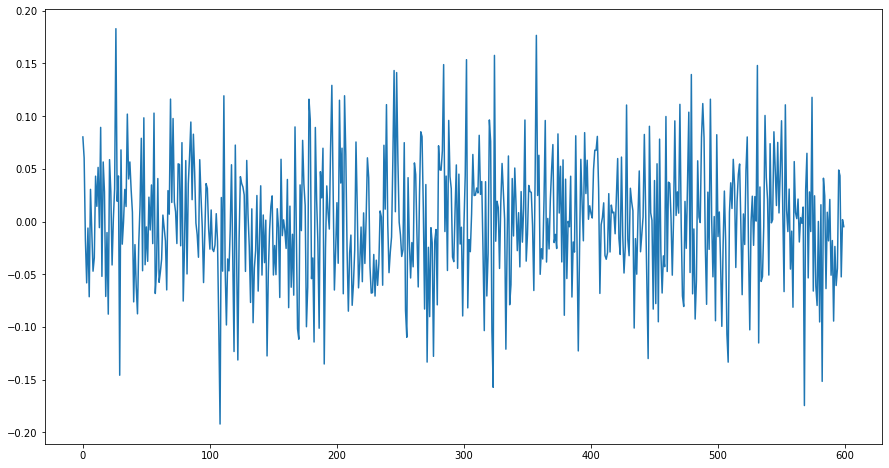

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

col = 'V3515'

plt.figure(figsize=(15, 5))
plt.subplot(121).boxplot(test_df[col].sort_values().reset_index(drop=True))  # boxplot
plt.subplot(122).plot(test_df[col].sort_values().reset_index(drop=True))  # qqplot
plt.show()

plt.figure(figsize=(15, 8))
plt.plot(test_df[col])
plt.show()

In [12]:
import multiprocessing
from multiprocessing import Pool

In [13]:
print(multiprocessing.cpu_count())
pool = Pool(processes=multiprocessing.cpu_count())
print(pool)
pool

4


In [14]:
tmp_list = [1,2,3,4,5]
pool.imap(lambda x: x^2, tmp_list)